# Higher Natural Reward Presented

In [288]:
%load_ext autoreload
%autoreload 2

from src.q_addicted import Addicted_Q_Agent
from src.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Basic Configurations

In [289]:
CONFIGS = {
    'alpha': 0.1,
    'gamma': 0.9,
    'epsilon': 0.1,
    'num_trials': 100,
    'num_states': 10,
    'num_actions': 3,
    'initial_dopamine_surge': 1,
    'dopamine_decay_rate': 0.99,
    'reward_states': [0, 9],
    'drug_reward': 1,
    'addicted': True,
    'exploration_strategy': 'epsilon_greedy',
    'if_natural': True,
    'natural_reward_states': [5],
    'natural_reward_boost': 2
}

# Addicted Agent Learning

In [290]:
agent = Addicted_Q_Agent(
    CONFIGS['alpha'],
    CONFIGS['gamma'],
    CONFIGS['epsilon'],
    CONFIGS['num_trials'],
    CONFIGS['num_states'],
    CONFIGS['num_actions'],
    CONFIGS['initial_dopamine_surge'],
    CONFIGS['dopamine_decay_rate'],
    CONFIGS['reward_states'],
    CONFIGS['drug_reward'],
    CONFIGS['addicted'],
    CONFIGS['exploration_strategy'],
    CONFIGS['if_natural'],
    CONFIGS['natural_reward_states'],
    CONFIGS['natural_reward_boost']
)
rpe, Q_across_trials = agent.learning()

# Stochastic process comparison (random walk) for average visit time

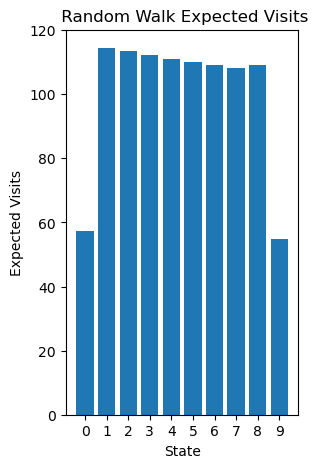

In [291]:
num_trials = 100
num_steps = 1000
avg_durations = agent.random_walk(num_trials, num_steps)

plt.figure(figsize=(3, 5))
plt.bar(range(CONFIGS['num_states']), avg_durations)
plt.title(' Random Walk Expected Visits')
plt.xlabel('State')
plt.ylabel('Expected Visits')
plt.xticks(range(CONFIGS['num_states']))
plt.show()

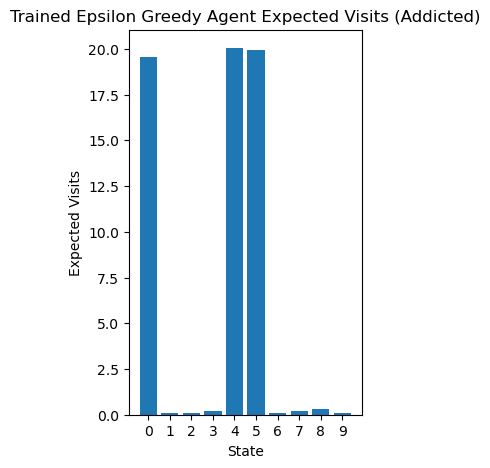

In [292]:
num_re_trials = 10000
max_action_per_trial = 100
avg_durations = agent.resimulate_state_durations(num_re_trials, max_action_per_trial)

plt.figure(figsize=(3, 5))
plt.bar(range(CONFIGS['num_states']), avg_durations)
plt.title('Trained Epsilon Greedy Agent Expected Visits (Addicted)')
plt.xlabel('State')
plt.ylabel('Expected Visits')
plt.xticks(range(CONFIGS['num_states']))
plt.show()

Very interesting result, the drug reward states are state 0, 5, 9 and the natural reward state is state 3. The Q-value function is not really helping the agent to build a robust understanding of the space (acknowledging that this is only at iter=100, with increasing in iteration to about iter=10000, the agent is still as robust in the performance, an further research question can investigate into this aspect). However. the key observation is that the highest duration is always surrounding one of the drug state, seems like once addiction captures the agent, it is very hard to escape, even to other addicted states (this uses epsilon-greedy algorithm alread). One key observation is that the addicted states near the end of the chain seems to be never really explored because it is alwyas trapped somewhere in the previous part of the chain.

During implementation, seems like once the number of state is greater than 5, the agent is just jumping back and forth between states and seems to stuck there (must use a counter to ensur ethat the while loop actually breaks).

Non-addicted agent

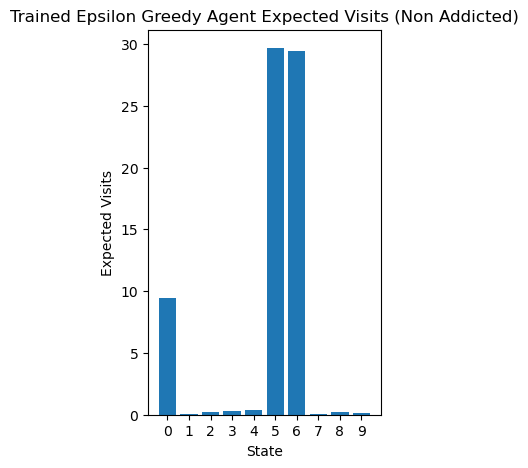

In [293]:
agent = Addicted_Q_Agent(
    CONFIGS['alpha'],
    CONFIGS['gamma'],
    CONFIGS['epsilon'],
    CONFIGS['num_trials'],
    CONFIGS['num_states'],
    CONFIGS['num_actions'],
    CONFIGS['initial_dopamine_surge'],
    CONFIGS['dopamine_decay_rate'],
    CONFIGS['reward_states'],
    CONFIGS['drug_reward'],
    False,
    CONFIGS['exploration_strategy'],
    CONFIGS['if_natural'],
    CONFIGS['natural_reward_states'],
    CONFIGS['natural_reward_boost']
)
rpe, Q_across_trials = agent.learning()

num_re_trials = 10000
max_action_per_trial = 100
avg_durations = agent.resimulate_state_durations(num_re_trials, max_action_per_trial)

plt.figure(figsize=(3, 5))
plt.bar(range(CONFIGS['num_states']), avg_durations)
plt.title('Trained Epsilon Greedy Agent Expected Visits (Non Addicted)')
plt.xlabel('State')
plt.ylabel('Expected Visits')
plt.xticks(range(CONFIGS['num_states']))
plt.show()

With no addiction simulation, it seems like it is perform a little bit better.

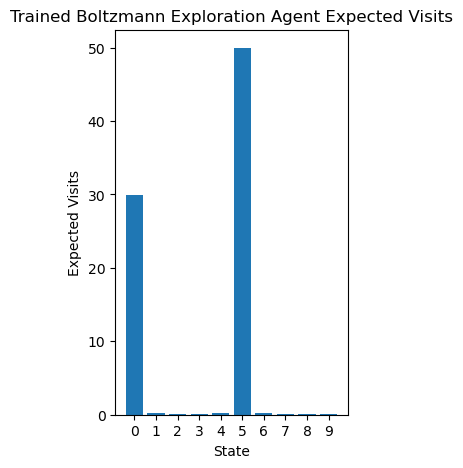

In [294]:
agent = Addicted_Q_Agent(
    CONFIGS['alpha'],
    CONFIGS['gamma'],
    CONFIGS['epsilon'],
    CONFIGS['num_trials'],
    CONFIGS['num_states'],
    CONFIGS['num_actions'],
    CONFIGS['initial_dopamine_surge'],
    CONFIGS['dopamine_decay_rate'],
    CONFIGS['reward_states'],
    CONFIGS['drug_reward'],
    False,
    'boltzmann_exploration',
    CONFIGS['if_natural'],
    CONFIGS['natural_reward_states'],
    CONFIGS['natural_reward_boost']
)
rpe, Q_across_trials = agent.learning()

num_re_trials = 10000
max_action_per_trial = 100
avg_durations = agent.resimulate_state_durations(num_re_trials, max_action_per_trial)

plt.figure(figsize=(3, 5))
plt.bar(range(CONFIGS['num_states']), avg_durations)
plt.title('Trained Boltzmann Exploration Agent Expected Visits')
plt.xlabel('State')
plt.ylabel('Expected Visits')
plt.xticks(range(CONFIGS['num_states']))
plt.show()

Very robust understanding of the higher natural reward

# Heatmap demonstration

In [295]:
agent_epsilon_greedy = Addicted_Q_Agent(
    CONFIGS['alpha'],
    CONFIGS['gamma'],
    CONFIGS['epsilon'],
    CONFIGS['num_trials'],
    CONFIGS['num_states'],
    CONFIGS['num_actions'],
    CONFIGS['initial_dopamine_surge'],
    CONFIGS['dopamine_decay_rate'],
    CONFIGS['reward_states'],
    CONFIGS['drug_reward'],
    CONFIGS['addicted'],
    CONFIGS['exploration_strategy'],
    CONFIGS['if_natural'],
    CONFIGS['natural_reward_states'],
    CONFIGS['natural_reward_boost']
)

agent_boltzmann_exploration = Addicted_Q_Agent(
    CONFIGS['alpha'],
    CONFIGS['gamma'],
    CONFIGS['epsilon'],
    CONFIGS['num_trials'],
    CONFIGS['num_states'],
    CONFIGS['num_actions'],
    CONFIGS['initial_dopamine_surge'],
    CONFIGS['dopamine_decay_rate'],
    CONFIGS['reward_states'],
    CONFIGS['drug_reward'],
    CONFIGS['addicted'],
    'boltzmann_exploration',
    CONFIGS['if_natural'],
    CONFIGS['natural_reward_states'],
    CONFIGS['natural_reward_boost']
)

rpe, Q_across_trials = agent_epsilon_greedy.learning()
rpe_2, Q_across_trials_2 = agent_boltzmann_exploration.learning()

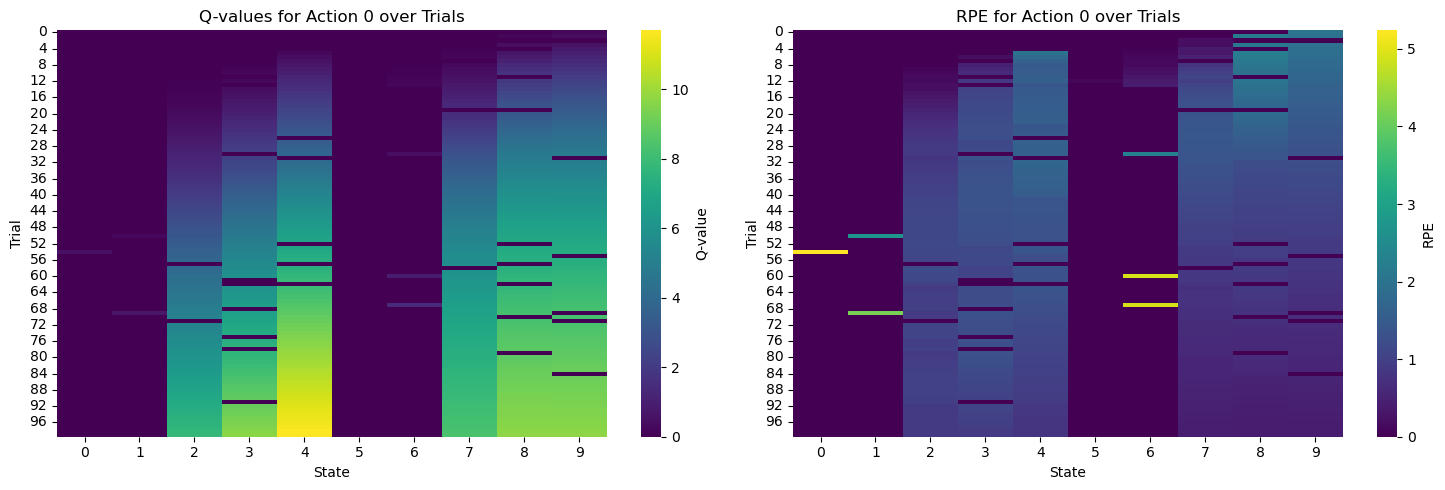

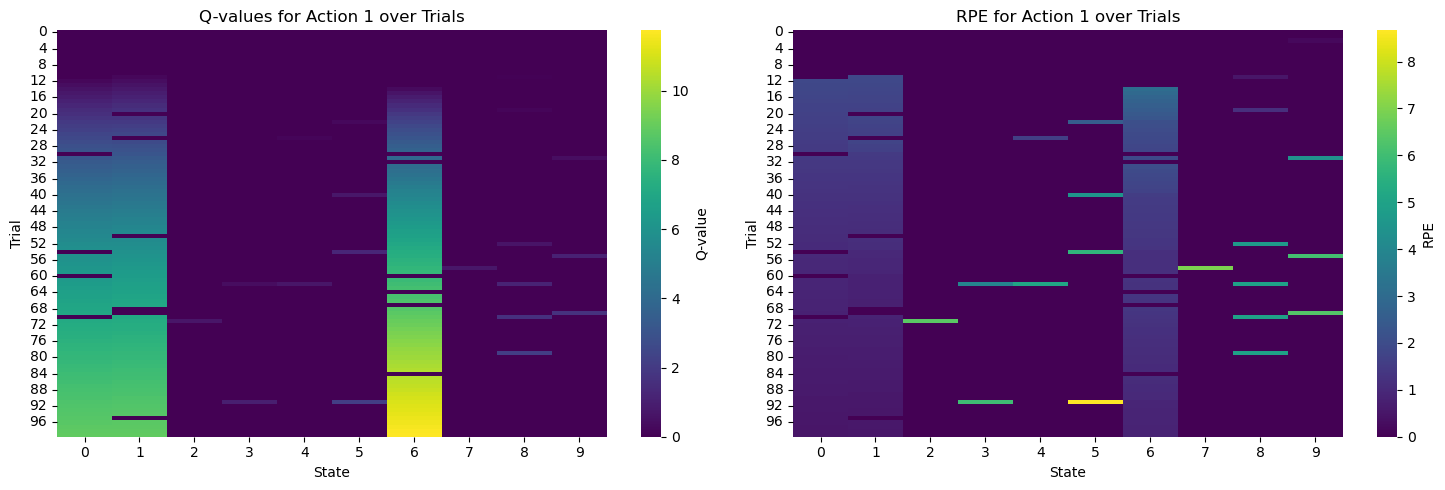

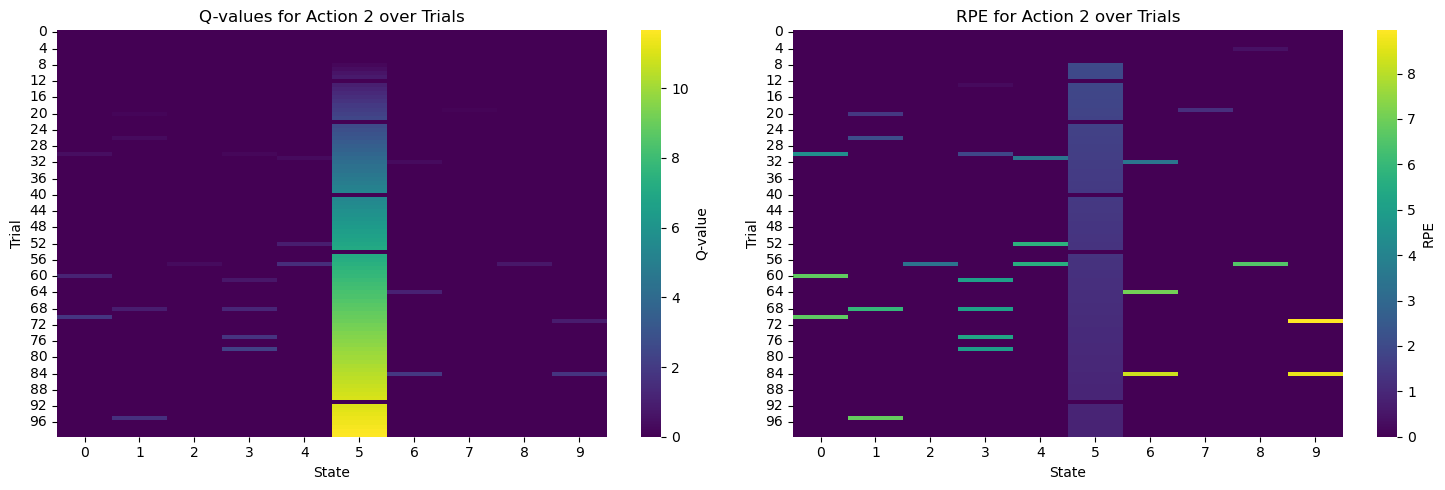

In [296]:
plot_heatmap(Q_across_trials, rpe)

As expected, it finds the drug states at state 0 and 9. However, it did not discover the higher natural reward state at 5. With a natural reward of only doubling the drug reward, the agent does not learn the reward, with more weighted natural reward, the agent would in the end be able to learn it.

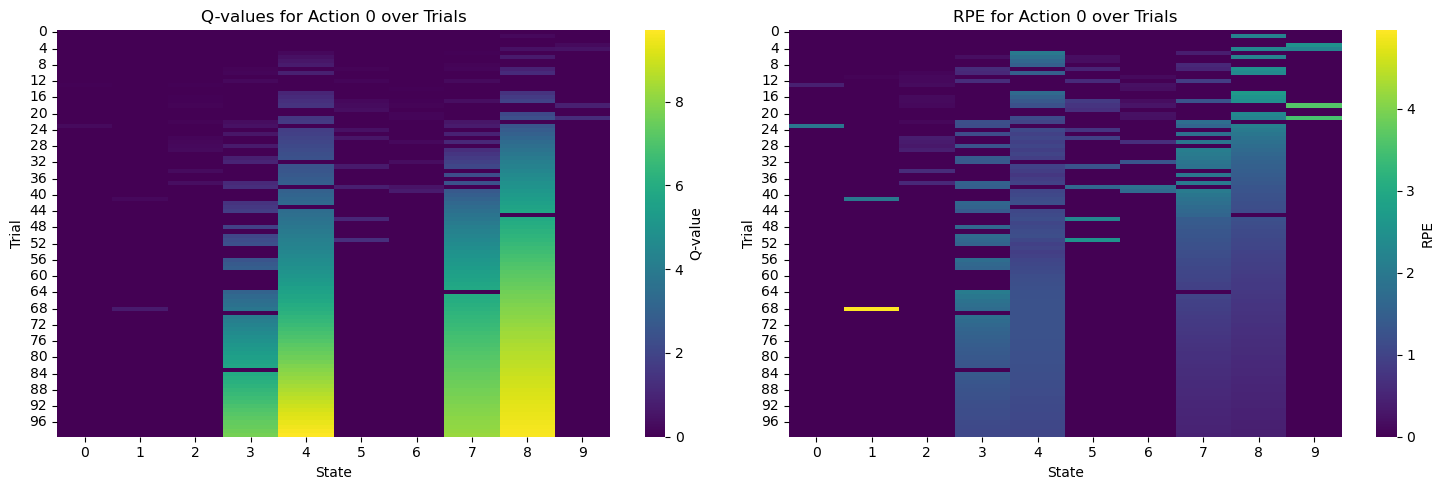

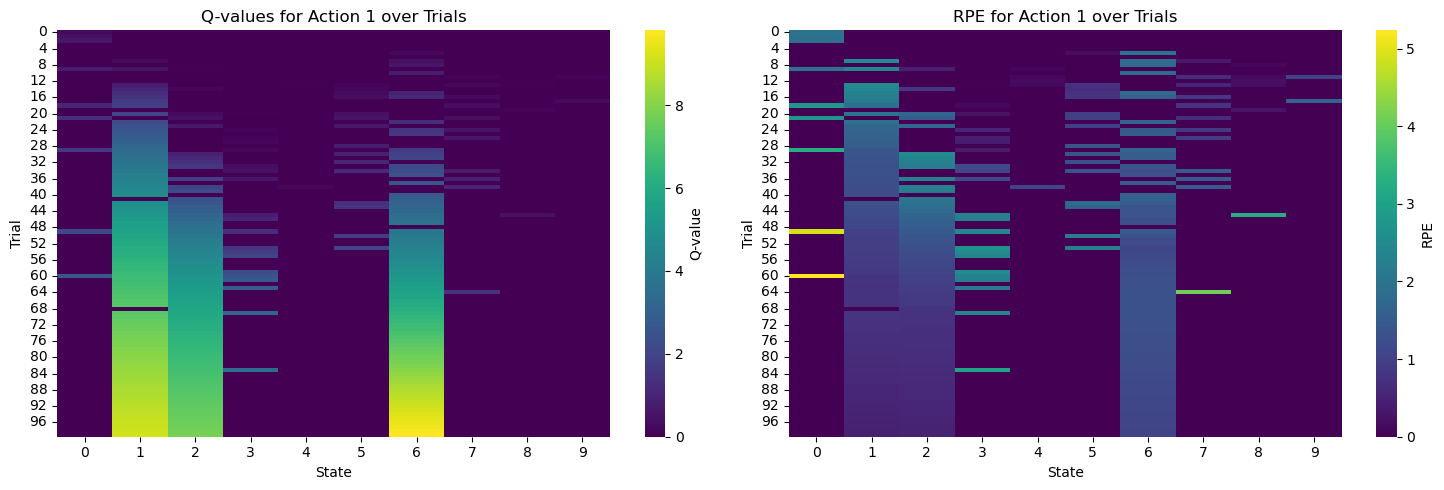

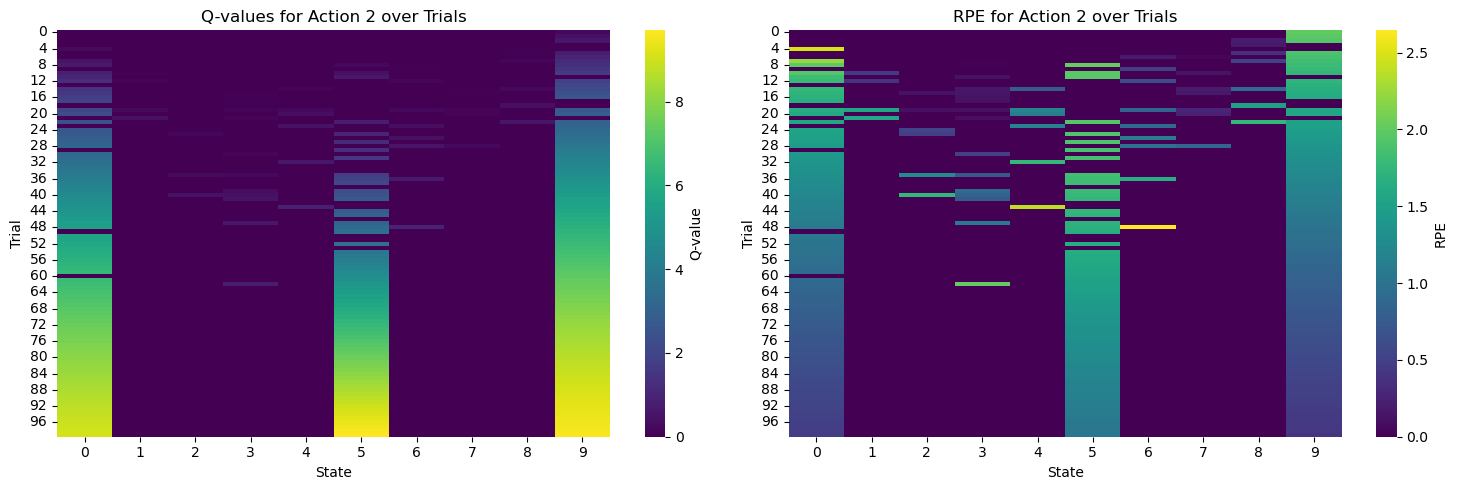

In [297]:
plot_heatmap(Q_across_trials_2, rpe_2)

Boltzzmann Exploration actually discovers the natural reward state at 5 when the atural reward is doubling the drug reward and actually finds it quite robustly.